<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [3]:

import pandas as pd
import matplotlib.pyplot as plt


<ipython-input-3-71225e3ad40e>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [4]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [5]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [6]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [7]:
df = pd.read_csv("m2_survey_data.csv")

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


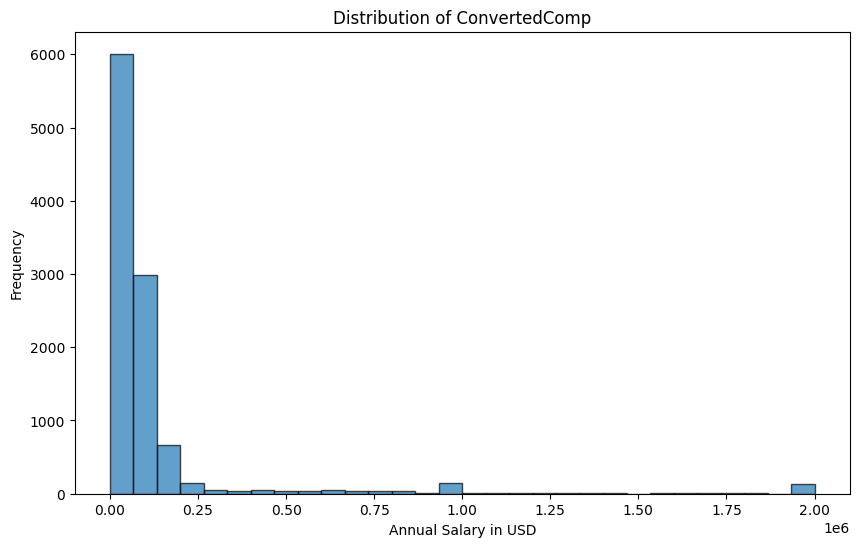

In [21]:
# your code goes here
# Plot the distribution curve
import matplotlib.pyplot as plt

# Drop missing values
data = df['ConvertedComp'].dropna()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of ConvertedComp')
plt.xlabel('Annual Salary in USD')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Plot the histogram for the column `ConvertedComp`.


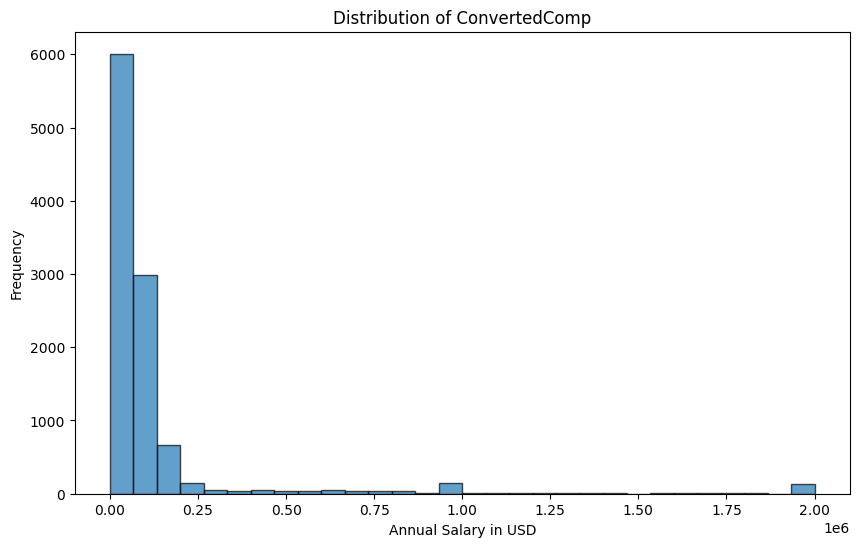

In [22]:
# your code goes here
import matplotlib.pyplot as plt

# Drop missing values from the ConvertedComp column
data = df['ConvertedComp'].dropna()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of ConvertedComp')
plt.xlabel('Annual Salary in USD')
plt.ylabel('Frequency')

# Show the plot
plt.show()

What is the median of the column `ConvertedComp`?


In [23]:
# your code goes here
# Calculate the median of the ConvertedComp column
median_salary = df['ConvertedComp'].median()

# Print the result
print(f"The median of the ConvertedComp column is: {median_salary}")

The median of the ConvertedComp column is: 57745.0


How many responders identified themselves only as a **Man**?


In [27]:
# your code goes here
# Count the number of responders who identify as 'Man'
df = pd.read_csv("m2_survey_data.csv")
count_men = df[df['Gender'] == 'Man'].shape[0]

print(f"Number of responders identifying as Man: {count_men}")

Number of responders identifying as Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [28]:
# your code goes here
# Calculate the median of the ConvertedComp column for responders who identify as 'Woman'
median_women = df.loc[df['Gender'] == 'Woman', 'ConvertedComp'].median()

# Print the result
print(f"The median ConvertedComp for responders identifying as Woman is: {median_women}")

The median ConvertedComp for responders identifying as Woman is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [29]:
# your code goes here
# Drop missing values from the Age column
age_data = df['Age'].dropna()

# Calculate the five-number summary
min_age = age_data.min()
q1_age = age_data.quantile(0.25)
median_age = age_data.median()
q3_age = age_data.quantile(0.75)
max_age = age_data.max()

# Print the results
print("Five-Number Summary for Age:")
print(f"Minimum: {min_age}")
print(f"First Quartile (Q1): {q1_age}")
print(f"Median: {median_age}")
print(f"Third Quartile (Q3): {q3_age}")
print(f"Maximum: {max_age}")

Five-Number Summary for Age:
Minimum: 16.0
First Quartile (Q1): 25.0
Median: 29.0
Third Quartile (Q3): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


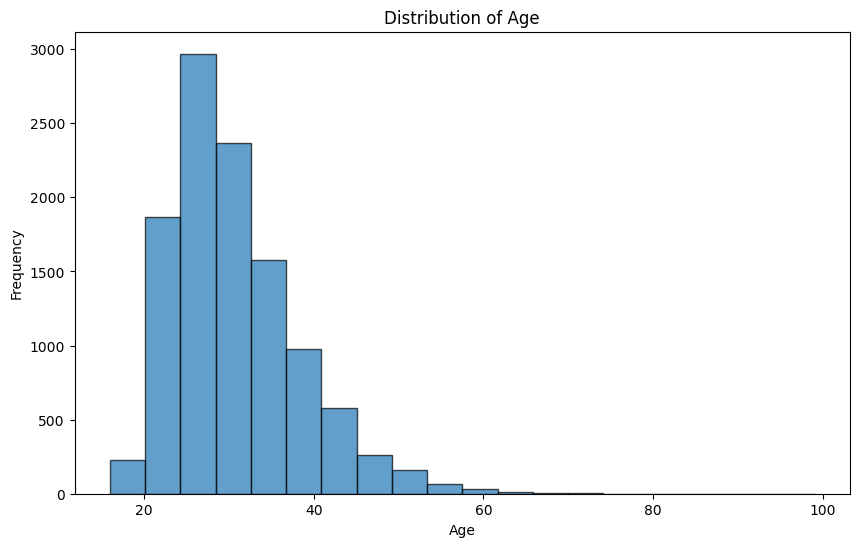

In [30]:
# your code goes here
import matplotlib.pyplot as plt

# Drop missing values from the Age column
age_data = df['Age'].dropna()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(age_data, bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


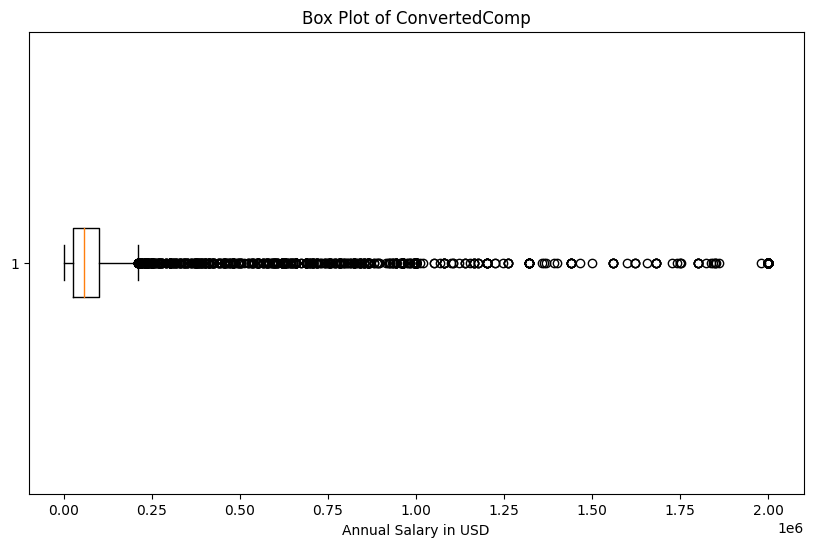

In [31]:
# your code goes here
import matplotlib.pyplot as plt

# Drop missing values from the ConvertedComp column
comp_data = df['ConvertedComp'].dropna()

# Plot the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(comp_data, vert=False)
plt.title('Box Plot of ConvertedComp')
plt.xlabel('Annual Salary in USD')

# Show the plot
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [32]:
# your code goes here
# Drop missing values from the ConvertedComp column
comp_data = df['ConvertedComp'].dropna()

# Calculate Q1 and Q3
q1 = comp_data.quantile(0.25)
q3 = comp_data.quantile(0.75)

# Calculate the IQR
iqr = q3 - q1

# Print the results
print(f"First Quartile (Q1): {q1}")
print(f"Third Quartile (Q3): {q3}")
print(f"Interquartile Range (IQR): {iqr}")

First Quartile (Q1): 26868.0
Third Quartile (Q3): 100000.0
Interquartile Range (IQR): 73132.0


Find out the upper and lower bounds.


In [34]:
# your code goes here
# Assuming the data is rounded to the nearest dollar
degree_of_accuracy = 1  # Nearest dollar

# Calculate the upper and lower bounds
upper_bound = df['ConvertedComp'] + (degree_of_accuracy / 2)
lower_bound = df['ConvertedComp'] - (degree_of_accuracy / 2)

# Print the first few bounds for verification
print("Upper Bounds:\n", upper_bound.head())
print("Lower Bounds:\n", lower_bound.head())

Upper Bounds:
 0     61000.5
1     95179.5
2     90000.5
3    455352.5
4     65277.5
Name: ConvertedComp, dtype: float64
Lower Bounds:
 0     60999.5
1     95178.5
2     89999.5
3    455351.5
4     65276.5
Name: ConvertedComp, dtype: float64


Identify how many outliers are there in the `ConvertedComp` column.


In [35]:
# your code goes here
# Drop missing values from the ConvertedComp column
comp_data = df['ConvertedComp'].dropna()

# Calculate Q1, Q3, and IQR
q1 = comp_data.quantile(0.25)
q3 = comp_data.quantile(0.75)
iqr = q3 - q1

# Calculate the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
# Identify outliers
outliers = comp_data[(comp_data < lower_bound) | (comp_data > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

# Print the result
print(f"Number of outliers in the ConvertedComp column: {num_outliers}")

Number of outliers in the ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [36]:
# your code goes here
# Drop missing values from the ConvertedComp column
comp_data = df['ConvertedComp'].dropna()

# Calculate Q1, Q3, and IQR
q1 = comp_data.quantile(0.25)
q3 = comp_data.quantile(0.75)
iqr = q3 - q1

# Calculate the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
# Create a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Print the shape of the new DataFrame to verify
print(f"Original DataFrame shape: {df.shape}")
print(f"New DataFrame shape without outliers: {df_no_outliers.shape}")

Original DataFrame shape: (11398, 85)
New DataFrame shape without outliers: (9703, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [38]:
# your code goes here
# Calculate the correlation matrix
# Select only the numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_df.corr()

# Extract correlations involving the 'Age' column
if 'Age' in correlation_matrix:
    age_correlations = correlation_matrix['Age']
    print("Correlation between Age and other numerical columns:")
    print(age_correlations)
else:
    print("The 'Age' column is not present in the numerical data.")

Correlation between Age and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


In [9]:
import pandas as pd

# Assuming df is your DataFrame and it has been defined previously
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Calculate the mean of the ConvertedComp column after removing outliers
mean_salary_no_outliers = filtered_df['ConvertedComp'].mean()

# Print the result
print(f"The mean of the ConvertedComp column after removing outliers is: {mean_salary_no_outliers}")

The mean of the ConvertedComp column after removing outliers is: 59883.20838915799


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
